# Unit 5 - Financial Planning


In [1]:
# Initial imports
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation
import json

%matplotlib inline

In [2]:
# Load .env enviroment variables
load_dotenv()

True

## Part 1 - Personal Finance Planner

### Collect Crypto Prices Using the `requests` Library

In [3]:
# Set current amount of crypto assets
my_btc = 1.2
my_eth = 5.3

In [4]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=CAD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=CAD"

In [5]:
# Fetch current BTC price
btc_data = requests.get(btc_url)
btc_content = btc_data.json()
btc_price = btc_content['data']['1']['quotes']['USD']['price']
# print(btc_content)
print(btc_price)
# Fetch current ETH price
eth_data = requests.get(eth_url)
eth_content = eth_data.json()
eth_price = eth_content['data']['1027']['quotes']['USD']['price']
print(eth_price)

# Compute current value of my crpto
my_btc_value = my_btc * btc_price
my_eth_value = my_eth * eth_price
# Print current crypto wallet balance
print(f"The current value of your {my_btc} BTC is ${my_btc_value:0.2f}")
print(f"The current value of your {my_eth} ETH is ${my_eth_value:0.2f}")

33865.0
1342.18
The current value of your 1.2 BTC is $40638.00
The current value of your 5.3 ETH is $7113.55


### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [6]:
# Current amount of shares
my_spy = 50
my_agg = 200

In [7]:
# Set Alpaca API key and secret
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")
print(f"Alpaca Key type: {type(alpaca_api_key)}")
print(f"Alpaca Secret Key type: {type(alpaca_secret_key)}")
# Create the Alpaca API object
alpaca = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version="v2")

Alpaca Key type: <class 'str'>
Alpaca Secret Key type: <class 'str'>


In [8]:
# Format current date as ISO format
today = pd.Timestamp("2021-01-25", tz="America/Chicago").isoformat()

# Set the tickers
tickers = ["AGG", "SPY"]

# Set timeframe to '1D' for Alpaca API
timeframe = "1D"

# Get current closing prices for SPY and AGG
func = alpaca.get_barset(
    tickers,
    timeframe,
    end = today
).df
df_portfolio = pd.DataFrame()
df_portfolio['AGG'] = func['AGG']['close']
df_portfolio['SPY'] = func['SPY']['close']
# Preview DataFrame
df_portfolio.head(7)

,AGG,SPY
time,,
2020-09-01 00:00:00-04:00,118.43,352.56
2020-09-02 00:00:00-04:00,118.66,357.68
2020-09-03 00:00:00-04:00,118.69,345.41
2020-09-04 00:00:00-04:00,118.10,342.60
2020-09-08 00:00:00-04:00,118.23,333.26
2020-09-09 00:00:00-04:00,118.19,339.76
2020-09-10 00:00:00-04:00,118.23,333.92


In [9]:
# Pick AGG and SPY close prices
agg_close_price = df_portfolio['AGG'][-1]
spy_close_price = df_portfolio['SPY'][-1]

# Print AGG and SPY close prices
print(f"Current AGG closing price: ${agg_close_price}")
print(f"Current SPY closing price: ${spy_close_price}")

Current AGG closing price: $117.54
Current SPY closing price: $384.4


In [10]:
# Compute the current value of shares
my_spy_value = my_spy * spy_close_price
my_agg_value = my_agg * agg_close_price

# Print current value of share
print(f"The current value of your {my_spy} SPY shares is ${my_spy_value:0.2f}")
print(f"The current value of your {my_agg} AGG shares is ${my_agg_value:0.2f}")

The current value of your 50 SPY shares is $19220.00
The current value of your 200 AGG shares is $23508.00


### Savings Health Analysis

In [11]:
# Set monthly household income
monthly_income = 12000

# Create savings DataFrame
df_savings = pd.DataFrame()
crypto = my_btc_value + my_eth_value
stonks = my_spy_value +my_agg_value
df_savings['Amount'] = [crypto, stonks]
df_savings.index = ["Crypto", "Shares"]
# Display savings DataFrame
display(df_savings)

,Amount
Crypto,47751.554
Shares,42728.000


<AxesSubplot:ylabel='Amount'>

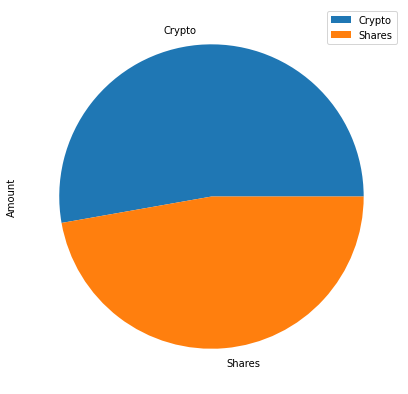

In [12]:
# Plot savings pie chart
df_savings.plot.pie(y = "Amount", figsize = (21, 7))

In [13]:
# Set ideal emergency fund
emergency_fund = monthly_income * 3

# Calculate total amount of savings
savings_total = crypto + stonks

# Validate saving health
if savings_total > emergency_fund:
    print(f"Congratulations! You have enough money in your emergency fund.")
elif savings_total == emergency_fund:
    print(f"Congratulations on reaching this financial goal.")
else:
    difference = emergency_fund - savings_total
    print(f"Sorry! Your emergency fund is looking kinda light. You're only {difference} away")

Congratulations! You have enough money in your emergency fund.


## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [14]:
# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen
start_date = pd.Timestamp('2015-08-07', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2020-08-07', tz='America/New_York').isoformat()

In [ ]:
# Get 5 years' worth of historical data for SPY and AGG
func2 = alpaca.get_barset(
    tickers,
    timeframe,
    start = start_date,
    end = end_date
).df
df_stock_data = pd.DataFrame()
df_stock_data['AGG'] = func2['AGG']['close']
df_stock_data['SPY'] = func2['SPY']['close']

# Display sample data
df_stock_data.head(7)

In [ ]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns
mc30 = MCSimulation(
    portfolio_data = func2,
    weights = [0.4, 0.6],
    num_simulation = 500,
    num_trading_days = 252*30
)
mc30.portfolio_data

In [ ]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
mc30.calc_cumulative_return()

In [ ]:
# Plot simulation outcomes
sim_plot = mc30.plot_simulation()

In [ ]:
# Plot probability distribution and confidence intervals
prob_dist_plot = mc30.plot_distribution()

### Retirement Analysis

In [ ]:
# Fetch summary statistics from the Monte Carlo simulation results
summ_stats = mc30.summarize_cumulative_return()

# Print summary statistics
print(summ_stats)

### Calculate the expected portfolio return at the 95% lower and upper confidence intervals based on a `$20,000` initial investment.

In [ ]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
ci_upper = round(summ_stats[9]* initial_investment, 2)
ci_lower = round(summ_stats[8]* initial_investment, 2)
# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `50%` increase in the initial investment.

In [ ]:
# Set initial investment
initial_investment = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
ci_upper = round(summ_stats[9]* initial_investment, 2)
ci_lower = round(summ_stats[8]* initial_investment, 2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")